In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

In [2]:
names = ['gender', 'race_or_ethnicity', 'parent_education', 'lunch',
       'test_prep_course', 'math_score', 'reading_score',
       'writing_score']

df = pd.read_csv("data/StudentsPerformance.csv", names=names, header=0)

In [3]:
df.head()

,gender,race_or_ethnicity,parent_education,lunch,test_prep_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender               1000 non-null object
race_or_ethnicity    1000 non-null object
parent_education     1000 non-null object
lunch                1000 non-null object
test_prep_course     1000 non-null object
math_score           1000 non-null int64
reading_score        1000 non-null int64
writing_score        1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.columns

Index(['gender', 'race_or_ethnicity', 'parent_education', 'lunch',
       'test_prep_course', 'math_score', 'reading_score', 'writing_score'],
      dtype='object')

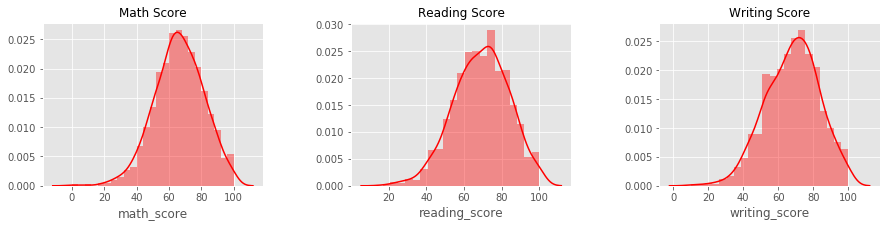

In [6]:
fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(1, 3, 1)
sns.distplot(df.math_score,ax=ax, color = 'r')
plt.title('Math Score', fontsize=12)
ax = fig.add_subplot(1, 3, 2)
sns.distplot(df.reading_score,ax=ax, color = 'r')
plt.title('Reading Score', fontsize=12)
ax = fig.add_subplot(1, 3, 3)
sns.distplot(df.writing_score,ax=ax, color = 'r')
plt.title('Writing Score', fontsize=12)
plt.show()

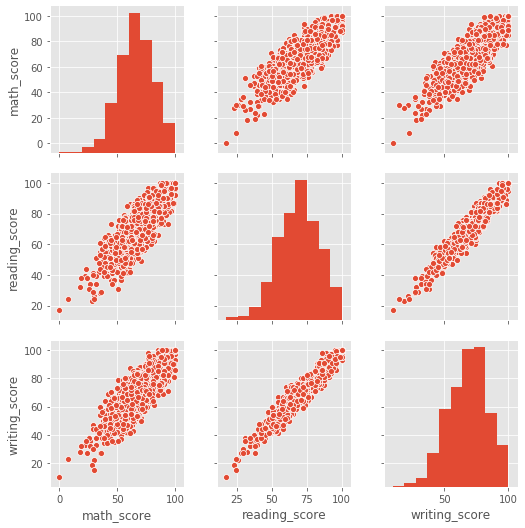

In [7]:
sns.pairplot(df)

There is a linear correlation between scores in different subjects.

In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
df.columns

Index(['gender', 'race_or_ethnicity', 'parent_education', 'lunch',
       'test_prep_course', 'math_score', 'reading_score', 'writing_score'],
      dtype='object')

### EDA

##### Gender

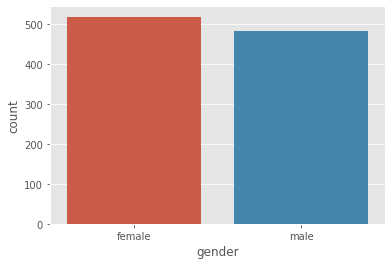

In [10]:
sns.countplot('gender', data = df)

In [11]:
df.groupby('gender').mean()

,math_score,reading_score,writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


Text(0.5, 0.98, 'Gender vs Score')

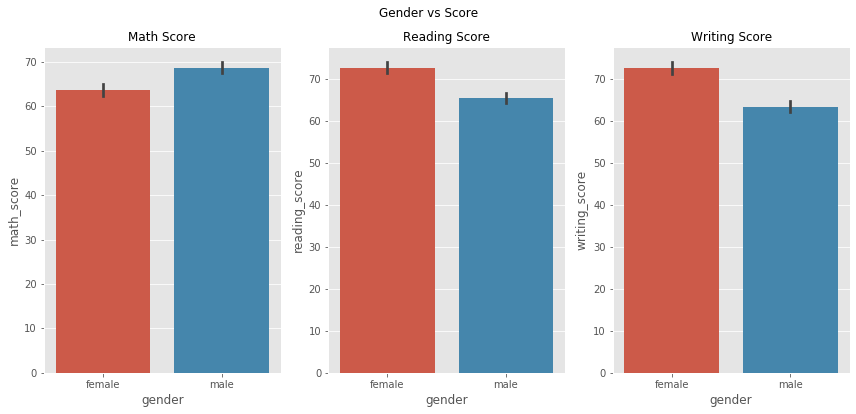

In [12]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 3, 1)
sns.barplot(x = 'gender', y = 'math_score', data = df)
ax.set_title('Math Score', fontsize = 12)
ax = fig.add_subplot(1, 3, 2)
sns.barplot(x = 'gender', y = 'reading_score', data = df)
ax.set_title('Reading Score', fontsize = 12)
ax = fig.add_subplot(1, 3, 3)
sns.barplot(x = 'gender', y = 'writing_score', data = df)
ax.set_title('Writing Score', fontsize = 12)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Gender vs Score', fontsize = 12)

Male students appear to be good at maths. Female students are good at reading and writing.

##### Race / Ethnicity

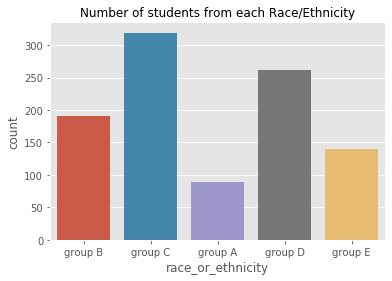

In [13]:
sns.countplot('race_or_ethnicity', data = df)
plt.title('Number of students from each Race/Ethnicity', fontsize=12)
plt.show()

In [14]:
df.groupby('race_or_ethnicity').mean()

,math_score,reading_score,writing_score
race_or_ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


Students from 'Group E' are good in all three areas.

##### Parent Education

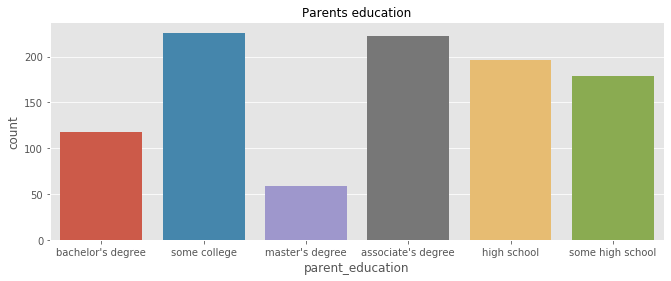

In [15]:
plt.figure(figsize=(11,4))
sns.countplot('parent_education', data = df)
plt.title('Parents education', fontsize=12)
plt.show()

In [16]:
df.groupby('parent_education', sort = True).mean()

,math_score,reading_score,writing_score
parent_education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


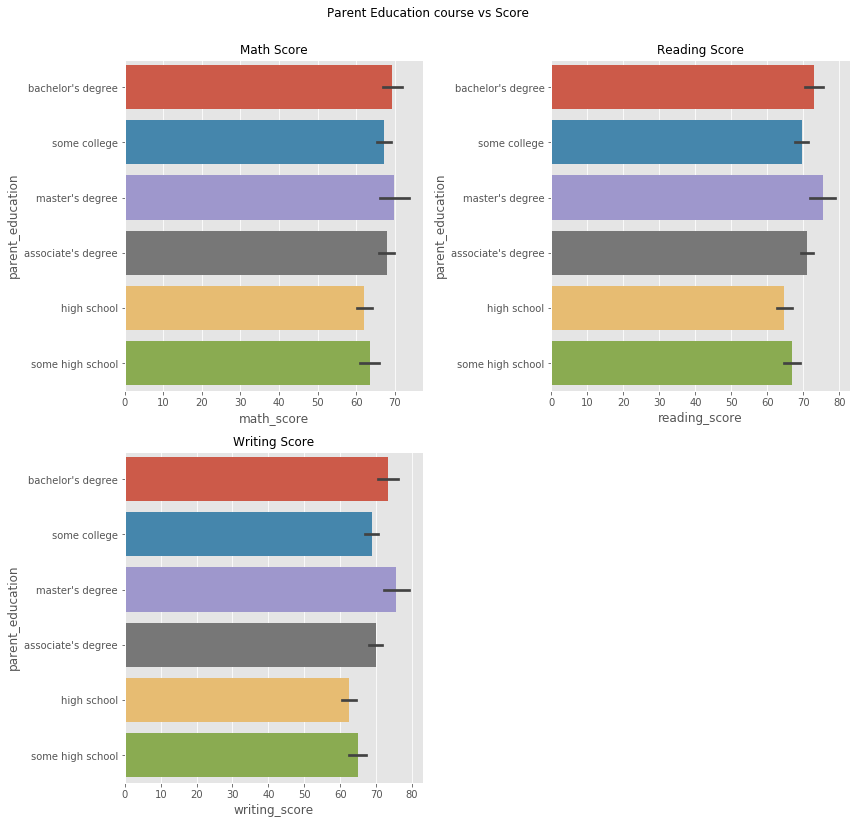

In [17]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(2, 2, 1)
sns.barplot(y = 'parent_education', x = 'math_score', data = df)
ax.set_title('Math Score', fontsize = 12)
ax = fig.add_subplot(2, 2, 2)
sns.barplot(y = 'parent_education', x = 'reading_score', data = df)
ax.set_title('Reading Score', fontsize = 12)
ax = fig.add_subplot(2, 2, 3)
sns.barplot(y = 'parent_education', x = 'writing_score', data = df)
ax.set_title('Writing Score', fontsize = 12)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Parent Education course vs Score', fontsize = 12)
plt.show()

Students, whose parents are degree holders, seems to perform better than students with parents who studied only school or college.

##### Lunch

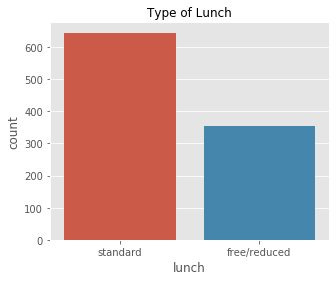

In [18]:
plt.figure(figsize=(5,4))
sns.countplot('lunch', data = df)
plt.title('Type of Lunch', fontsize=12)
plt.show()

In [19]:
df.groupby('lunch').mean()

,math_score,reading_score,writing_score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


Text(0.5, 0.98, 'Test preparation course vs Score')

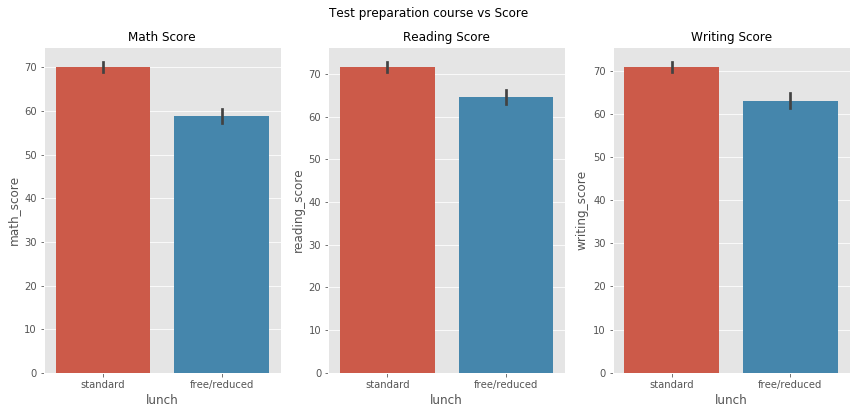

In [20]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 3, 1)
sns.barplot(x = 'lunch', y = 'math_score', data = df)
ax.set_title('Math Score', fontsize = 12)
ax = fig.add_subplot(1, 3, 2)
sns.barplot(x = 'lunch', y = 'reading_score', data = df)
ax.set_title('Reading Score', fontsize = 12)
ax = fig.add_subplot(1, 3, 3)
sns.barplot(x = 'lunch', y = 'writing_score', data = df)
ax.set_title('Writing Score', fontsize = 12)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Test preparation course vs Score', fontsize = 12)

Students who eat standard lunch have higher averages in all subjects compared to students getting free/reduced lunch.

##### Test Preparation course

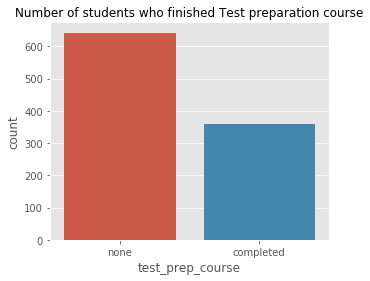

In [21]:
plt.figure(figsize=(5,4))
sns.countplot('test_prep_course', data = df)
plt.title('Number of students who finished Test preparation course', fontsize=12)
plt.show()

Many students did not take the preparation course.

In [22]:
df.groupby('test_prep_course').mean()

,math_score,reading_score,writing_score
test_prep_course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


Text(0.5, 0.98, 'Test preparation course vs Score')

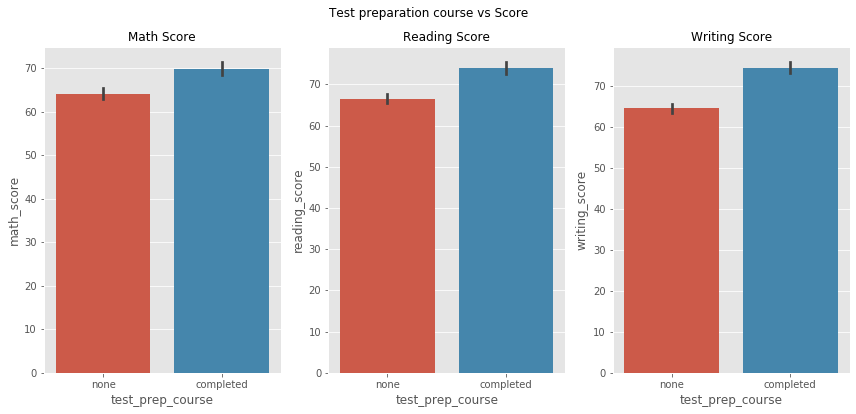

In [23]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 3, 1)
sns.barplot(x = 'test_prep_course', y = 'math_score', data = df)
ax.set_title('Math Score', fontsize = 12)
ax = fig.add_subplot(1, 3, 2)
sns.barplot(x = 'test_prep_course', y = 'reading_score', data = df)
ax.set_title('Reading Score', fontsize = 12)
ax = fig.add_subplot(1, 3, 3)
sns.barplot(x = 'test_prep_course', y = 'writing_score', data = df)
ax.set_title('Writing Score', fontsize = 12)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Test preparation course vs Score', fontsize = 12)

Performance of the students who to a test preparation course seem to perform well.
